In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_parquet("data.parquet")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7137217 entries, 0 to 7137216
Data columns (total 55 columns):
 #   Column                                Dtype  
---  ------                                -----  
 0   ID zdarzenia                          int64  
 1   ID pojazdu                            float64
 2   ID uczestnika                         int64  
 3   Rodzaj uczestnika                     object 
 4   Data urodzenia                        object 
 5   Płeć                                  object 
 6   Uprawnienie do kierowania             object 
 7   Liczba lat kierowania                 float64
 8   Rozstrzygnięcie                       object 
 9   Zabity                                object 
 10  Ranny                                 object 
 11  Jazda bez (zabezpieczeń)              object 
 12  Miejsce w pojeździe                   object 
 13  Czy sprawca                           object 
 14  Dzialanie (pod wplywem)               object 
 15  Informacja doda

In [3]:
# Dict
pl_to_en = {
    "ID zdarzenia": "Event ID",
    "ID pojazdu": "Vehicle ID",
    "ID uczestnika": "Participant ID",
    "Rodzaj uczestnika": "Participant type",
    "Data urodzenia": "Date of birth",
    "Płeć": "Sex",
    "Uprawnienie do kierowania": "Driving license status",
    "Liczba lat kierowania": "Years of driving experience",
    "Rozstrzygnięcie": "Legal resolution",
    "Zabity": "Killed",
    "Ranny": "Injured",
    "Jazda bez (zabezpieczeń)": "No safety equipment",
    "Miejsce w pojeździe": "Seat position",
    "Czy sprawca": "Is at fault",
    "Dzialanie (pod wplywem)": "Under influence",
    "Informacja dodatkowa": "Additional info",
    "Stan pojazdu": "Vehicle condition",
    "Marka pojazdu": "Vehicle brand",
    "Model pojazdu": "Vehicle model",
    "Czy wyposażenie ochronne": "Protective equipment present",
    "Pojazdy szczególne": "Special vehicles",
    "Rok produkcji": "Production year",
    "Data ostatniego badania technicznego": "Last technical inspection",
    "Rodzaj pojazdu": "Vehicle type",
    "IDKSIP zdarzenia": "Event ID (KSIP)",
    "Data zdarzenia": "Date of event",
    "Powiat": "County",
    "Gmina": "Commune",
    "Wojewodztwo": "Province",
    "Miejscowość": "Town/city",
    "Ulica": "Street",
    "Numer domu": "House number",
    "Numer drogi": "Road number",
    "KM HM (Pikietaż)": "Distance marker (KM/HM)",
    "Rondo/węzeł": "Roundabout or junction",
    "Skrzyżowanie z ulicą": "Intersection with street",
    "Skrzyżowanie z drogą": "Intersection with road",
    "Odległość do skrzyżowania": "Distance to intersection",
    "GPS x": "GPS x",
    "GPS y": "GPS y",
    "Wypadek/Kolizja": "Accident type",
    "Obszar": "Area type",
    "Geometria drogi": "Road geometry",
    "Skrzyżowanie": "Intersection",
    "Charakterystyka miejsca zdarzenia": "Crash site characteristics",
    "Oświetlenie": "Lighting",
    "Warunki atmosferyczne": "Weather conditions",
    "Rodzaj zdarzenia": "Crash type",
    "Prędkość dopuszczalna": "Speed limit",
    "Rodzaj drogi": "Road type",
    "Nawierzchnia drogi": "Road surface",
    "Stan nawierzchni": "Road surface condition",
    "Sygnalizacja świetlna": "Traffic signal",
    "Oznakowanie poziome": "Road markings",
    "Inne przyczyny": "Other causes"
}

# Zmień nazwy kolumn na angielskie tam, gdzie są w słowniku
df.rename(columns=pl_to_en, inplace=True)

In [4]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

for col, count in missing.items():
    percent = count / len(df) * 100
    print(f"{col}: {count} missing ({percent:.2f}%)")

No safety equipment: 7125825 missing (99.84%)
Special vehicles: 7120446 missing (99.77%)
Vehicle condition: 7110186 missing (99.62%)
Protective equipment present: 7088778 missing (99.32%)
Roundabout or junction: 7071900 missing (99.08%)
Seat position: 7039032 missing (98.62%)
Under influence: 6858628 missing (96.10%)
Distance to intersection: 6749903 missing (94.57%)
Other causes: 6553992 missing (91.83%)
Intersection with road: 5994610 missing (83.99%)
Last technical inspection: 5611120 missing (78.62%)
Distance marker (KM/HM): 5528143 missing (77.46%)
Production year: 5417008 missing (75.90%)
Intersection with street: 5349920 missing (74.96%)
Intersection: 5217858 missing (73.11%)
Additional info: 3528297 missing (49.44%)
House number: 3115991 missing (43.66%)
Road geometry: 2012628 missing (28.20%)
Street: 1612297 missing (22.59%)
Years of driving experience: 1067991 missing (14.96%)
Road number: 882607 missing (12.37%)
Event ID (KSIP): 669066 missing (9.37%)
Date of birth: 470598 m

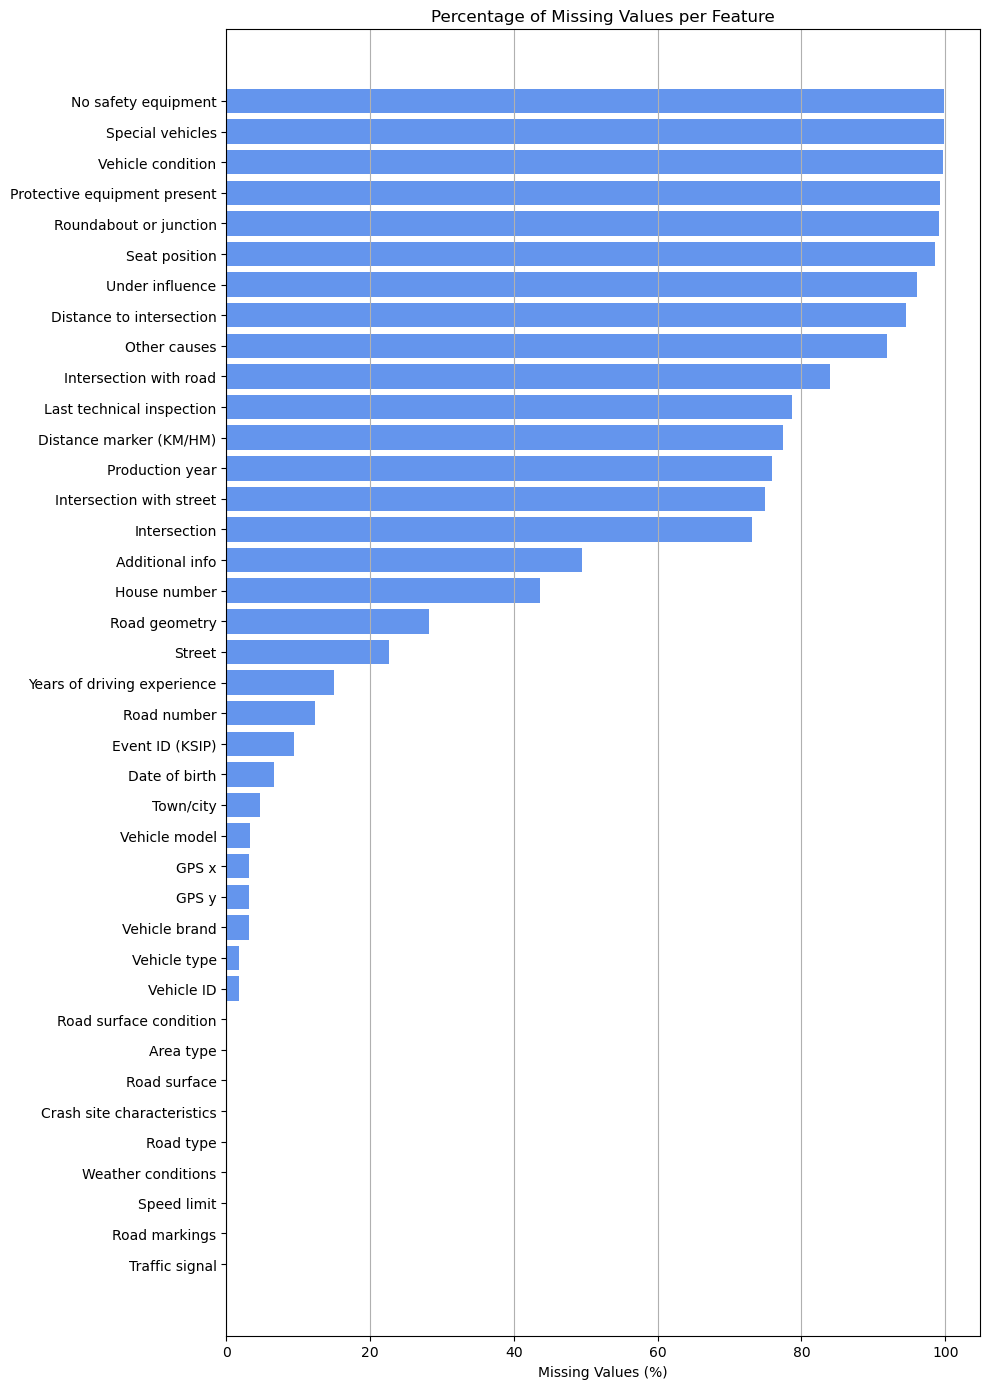

In [5]:
# Calculate missing values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing_percent = (missing / len(df) * 100).round(2)

# Create summary table
missing_summary = pd.DataFrame({
    "Feature": missing.index,
    "Missing Count": missing.values,
    "Missing %": missing_percent.values
})

# Plot
plt.figure(figsize=(10, 14))
missing_summary.sort_values(by="Missing %", ascending=True, inplace=True)
plt.barh(missing_summary["Feature"], missing_summary["Missing %"], color='cornflowerblue')
plt.xlabel("Missing Values (%)")
plt.title("Percentage of Missing Values per Feature")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [11]:
df.to_parquet("data_01.parquet", index=False)